In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
import plotly.express as px

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [ ]:
data_url = "https://media.githubusercontent.com/media/greenelab/tybalt/master/data/clinical_data.tsv "

In [ ]:
#df = pd.read_csv(data_url, error_bad_lines=False)
df = pd.read_csv(data_url, delimiter='\t', on_bad_lines='skip')



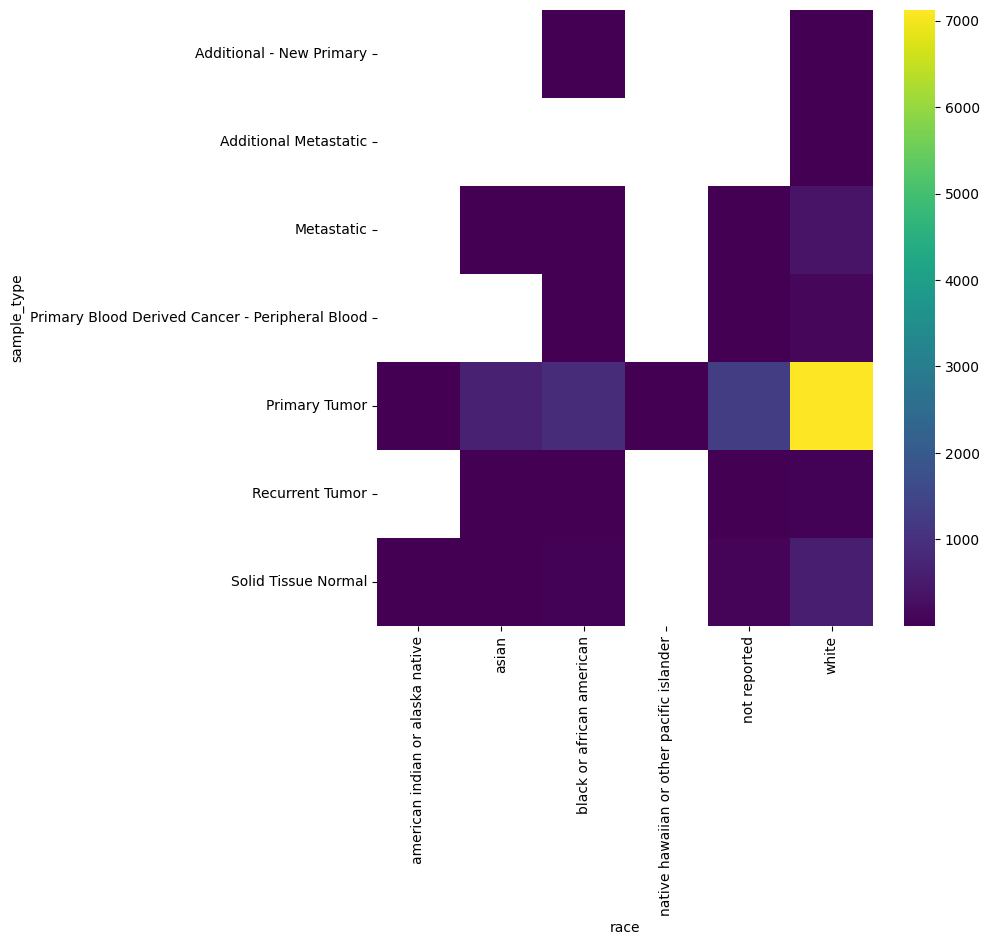

In [ ]:
# title race vs sample_type
# heatmap to visualize the sample types across different races
# shows potenttial correlation/relationship

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sample_type'].value_counts()
    for x_label, grp in df.groupby('race')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race')
_ = plt.ylabel('sample_type')

In [ ]:
len(df)

11284

In [ ]:
# data of the Background genes
data_gene = "https://raw.githubusercontent.com/greenelab/tybalt/master/data/background_genes.txt"
data_genes = pd.read_csv(data_gene)

In [ ]:
data_genes.head()

,RPS4Y1
0,XIST
1,KRT5
2,AGR2
3,CEACAM5
4,KRT6A


In [ ]:
#The different types of diseases in the dataset
df['disease']

0                                   Stomach adenocarcinoma
1                                  Skin Cutaneous Melanoma
2        Cervical squamous cell carcinoma and endocervi...
3                     Uterine Corpus Endometrial Carcinoma
4                                        Thyroid carcinoma
                               ...                        
11279                         Lung squamous cell carcinoma
11280                Kidney renal papillary cell carcinoma
11281                         Bladder Urothelial Carcinoma
11282                            Breast invasive carcinoma
11283                       Liver hepatocellular carcinoma
Name: disease, Length: 11284, dtype: object

Text(0.5, 0, 'Distribution of Age Disease Diagnosis')

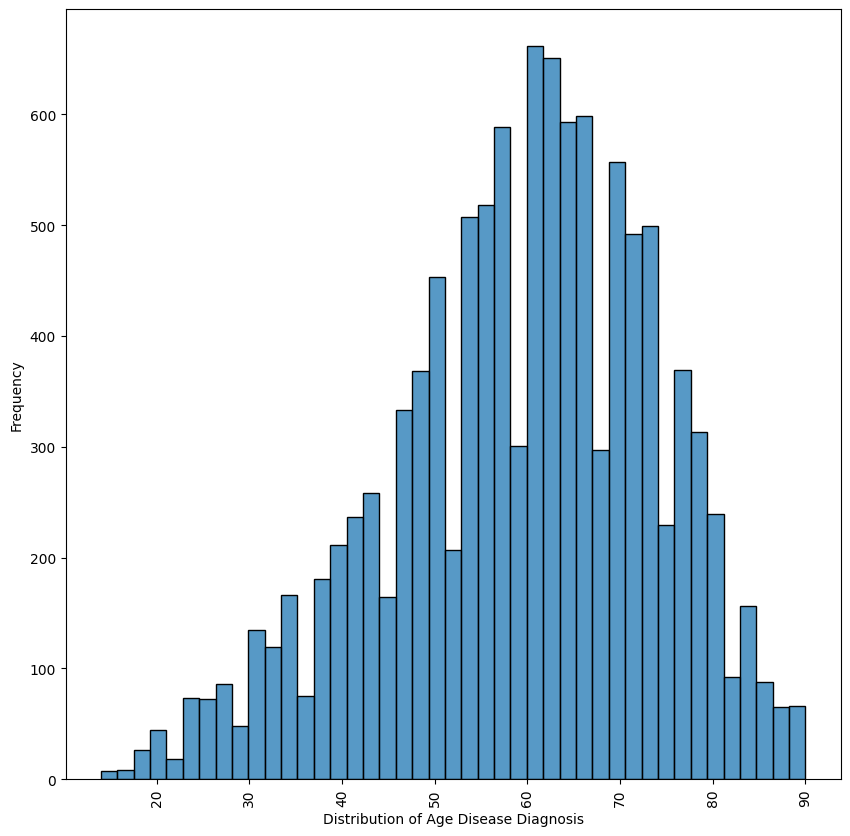

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(data= df ,x = 'age_at_diagnosis')
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.xlabel("Distribution of Age Disease Diagnosis")

Text(0.5, 0, 'Distribution of Diseases')

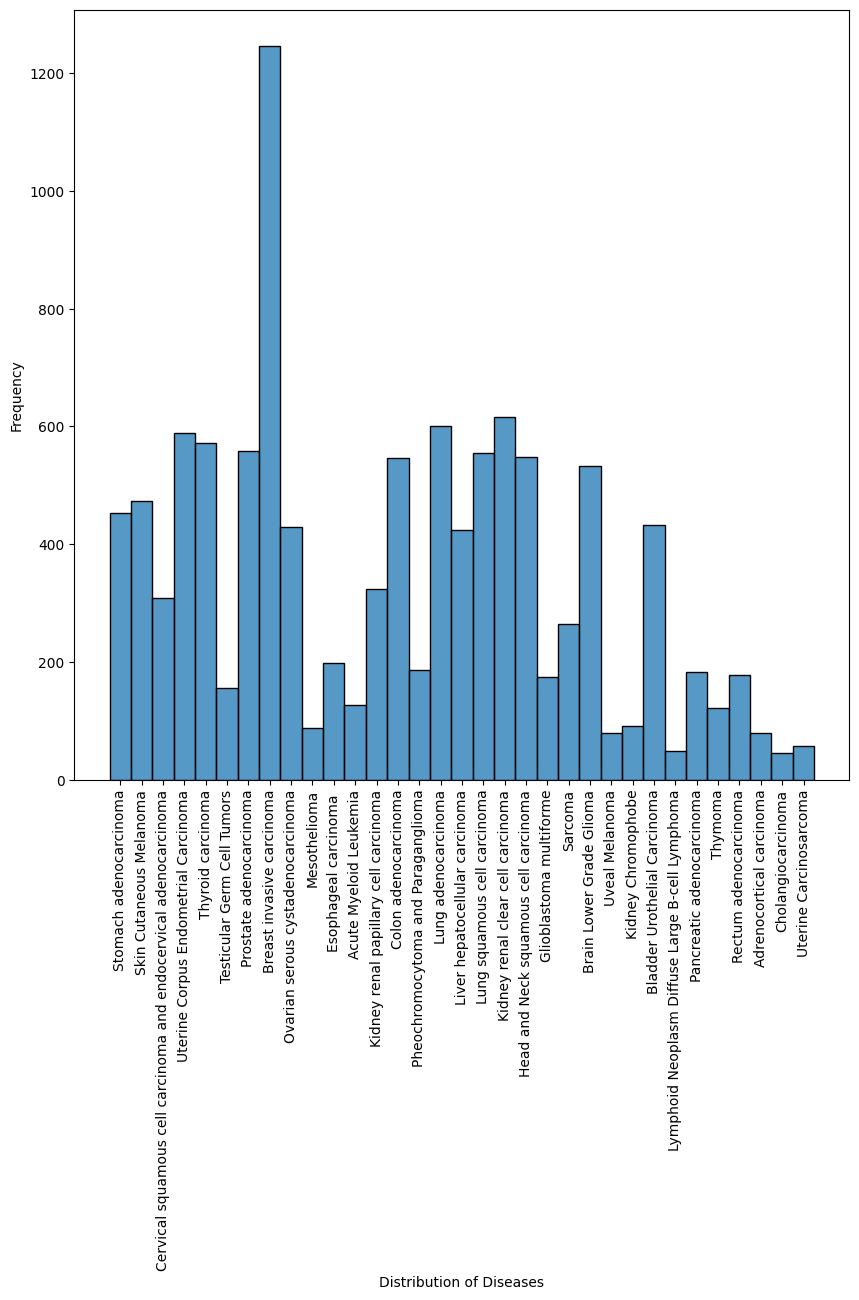

In [ ]:
# the number one leading cancer diagnosis is breast cancer
plt.figure(figsize = (10,10))
sns.histplot(data= df ,x = 'disease')
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.xlabel("Distribution of Diseases")

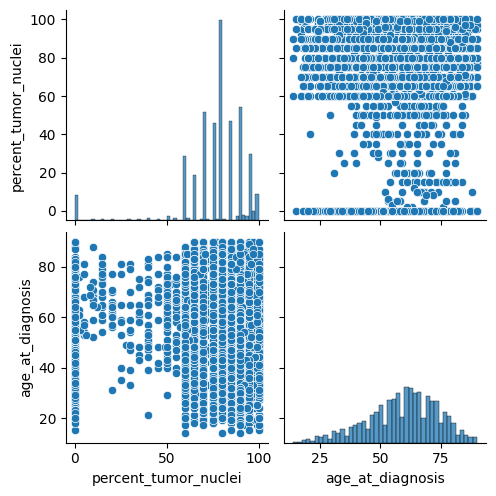

In [ ]:
sns.pairplot(data=df)

Text(0, 0.5, 'Frequency')

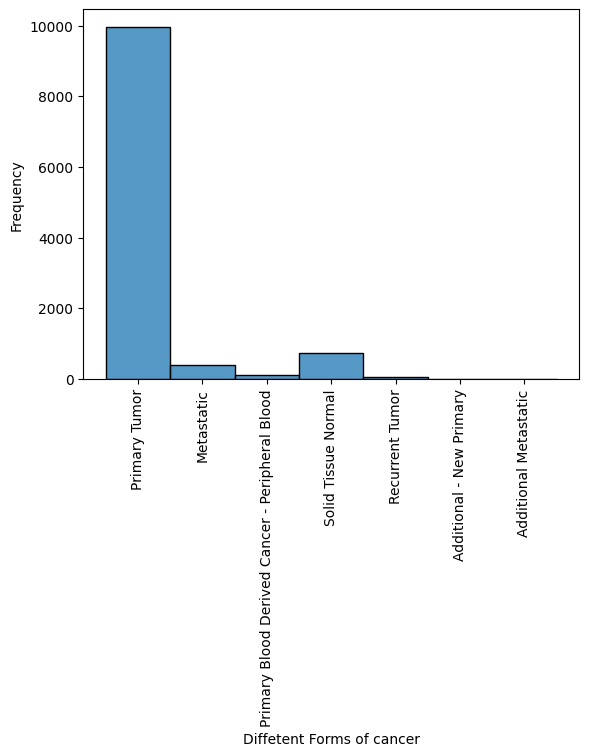

In [ ]:
sns.histplot(data= df ,x = 'sample_type')
plt.xticks(rotation = 90)
plt.xlabel("Diffetent Forms of cancer")
plt.ylabel('Frequency')

Text(0, 0.5, 'Disease Type')

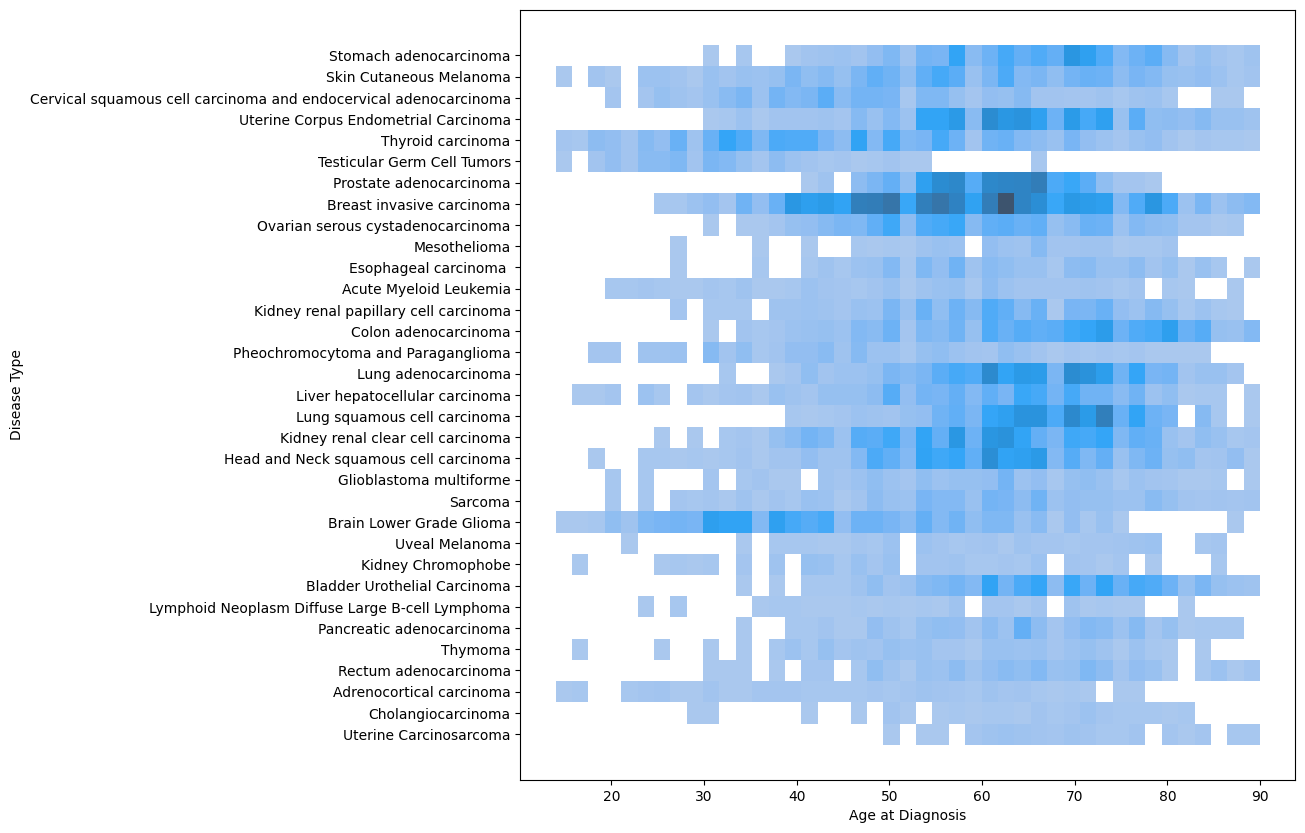

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(data= df ,x = 'age_at_diagnosis', y= 'disease')
plt.xlabel("Age at Diagnosis")
plt.ylabel("Disease Type")


In [ ]:
prim  = df[df['sample_type']== 'Primary Tumor']

In [ ]:
unique_sample_types = df['sample_type'].value_counts().index.tolist()

In [ ]:
print("unique types:",unique_sample_types)

unique types: ['Primary Tumor', 'Solid Tissue Normal', 'Metastatic', 'Primary Blood Derived Cancer - Peripheral Blood', 'Recurrent Tumor', 'Additional - New Primary', 'Additional Metastatic']


In [ ]:
# count of primary tumer
len(prim)


9962

In [ ]:
primblood = prim  = df[df['sample_type']== 'Primary Blood Derived Cancer - Peripheral Blood']

In [ ]:
# replace NAN values with 0s in the drug column
df['drug'] = df['drug'].fillna(0)

In [ ]:

df.drop(df[df['race'] == 'not reported'].index)
df.drop(df[df['ethnicity'] == 'not reported'].index)
df.drop(df[df['percent_tumor_nuclei'] == 'NaN'].index)
df.drop(df[df['age_at_diagnosis'] == 'NaN'].index)

,sample_id,ethnicity,year_of_diagnosis,gender,race,organ,percent_tumor_nuclei,age_at_diagnosis,sample_type,analysis_center,vital_status,acronym,portion_id,disease,drug,platform,stage
0,TCGA-CD-8534,not hispanic or latino,2011,male,asian,Stomach,85.0,41.0,Primary Tumor,BCGSC,alive,STAD,TCGA-CD-8534-01A-11,Stomach adenocarcinoma,0,Illumina HiSeq,Stage II
1,TCGA-ER-A19A,not hispanic or latino,2006,male,white,Skin,85.0,79.0,Metastatic,UNC,alive,SKCM,TCGA-ER-A19A-06A-21,Skin Cutaneous Melanoma,0,Illumina HiSeq,Stage IV
2,TCGA-C5-A1M8,not hispanic or latino,2001,female,white,Cervix,85.0,43.0,Primary Tumor,UNC,alive,CESC,TCGA-C5-A1M8-01A-21,Cervical squamous cell carcinoma and endocervi...,0,Illumina HiSeq,NaN
3,TCGA-D1-A0ZN,not hispanic or latino,2009,female,white,Uterus,60.0,60.0,Primary Tumor,UNC,alive,UCEC,TCGA-D1-A0ZN-01A-11,Uterine Corpus Endometrial Carcinoma,0,Illumina GA,NaN
4,TCGA-EM-A4FF,not reported,2006,female,not reported,Thyroid,75.0,40.0,Primary Tumor,UNC,alive,THCA,TCGA-EM-A4FF-01A-11,Thyroid carcinoma,0,Illumina HiSeq,Stage I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11279,TCGA-60-2724,not hispanic or latino,2008.0,male,white,Lung,85.0,47.0,Primary Tumor,UNC,alive,LUSC,TCGA-60-2724-01A-01,Lung squamous cell carcinoma,Navelbine,Illumina HiSeq,Stage IIIA
11280,TCGA-HE-A5NK,not reported,NaN,male,not reported,Kidney,80.0,82.0,Primary Tumor,UNC,alive,KIRP,TCGA-HE-A5NK-01A-11,Kidney renal papillary cell carcinoma,0,Illumina HiSeq,NaN
11281,TCGA-ZF-A9RC,not hispanic or latino,2007.0,male,white,Bladder,60.0,77.0,Primary Tumor,UNC,alive,BLCA,TCGA-ZF-A9RC-01A-11,Bladder Urothelial Carcinoma,0,Illumina HiSeq,Stage III
11282,TCGA-E9-A1R7,not hispanic or latino,2011.0,female,white,Breast,0.0,64.0,Solid Tissue Normal,UNC,alive,BRCA,TCGA-E9-A1R7-11A-42,Breast invasive carcinoma,Tamoxifen,Illumina HiSeq,Stage IIA


In [ ]:
unique_year = df['year_of_diagnosis'].unique()
year_diagnosis_cleaned = []

for item in unique_year:
    if isinstance(item, str) and item.isdigit() and item != '0': # checks if it contains strings
        if len(item) < 4:
            year_diagnosis_cleaned.append('19' + item)
        else:
            year_diagnosis_cleaned.append(item)


df_year_cleaned = []
for value in df['year_of_diagnosis']:
  if value in year_diagnosis_cleaned:
        df_year_cleaned.append(value)
  else:
        year_diagnosis_cleaned.append(item)
df['year_of_diagnosis_cleaned'] = df['year_of_diagnosis'].apply(lambda x: x if x in year_diagnosis_cleaned else np.nan)

print(df_year_cleaned)

['2011', '2006', '2001', '2009', '2006', '2002', '2012', '2006', '2012', '2008', '2009', '2006', '2008', '2010', '2002', '2009', '2009', '2007', '2007', '1993', '2013', '2010', '2007', '2012', '2011', '2011', '2013', '2008', '2009', '2008', '2009', '2004', '2007', '2010', '2005', '1999', '2003', '2002', '2007', '2007', '2011', '2013', '2010', '2011', '2008', '2006', '2011', '2010', '2002', '2011', '2011', '2012', '2008', '2011', '2012', '2011', '2012', '2010', '2008', '2006', '2010', '2012', '2013', '2007', '2008', '2010', '2003', '1998', '2011', '1996', '2012', '2009', '2002', '2012', '2006', '2007', '2009', '2012', '2013', '2011', '2010', '2009', '2006', '2006', '1997', '2007', '2013', '2011', '2012', '2009', '2009', '2006', '1999', '2000', '1989', '2005', '2008', '2006', '2004', '2004', '2013', '2011', '2003', '2008', '2011', '2002', '2005', '2010', '2010', '2013', '2009', '2011', '2013', '2010', '2012', '2009', '1996', '2004', '2011', '2010', '2005', '2005', '2012', '2008', '2001',

In [ ]:
features = ['ethnicity', 'gender', 'race','organ', 'sample_type', 'analysis_center', 'platform', 'portion_id', 'percent_tumor_nuclei', 'age_at_diagnosis', 'year_of_diagnosis_cleaned']

In [ ]:
X = df[features]
X

,ethnicity,gender,race,organ,sample_type,analysis_center,platform,portion_id,percent_tumor_nuclei,age_at_diagnosis,year_of_diagnosis_cleaned
0,not hispanic or latino,male,asian,Stomach,Primary Tumor,BCGSC,Illumina HiSeq,TCGA-CD-8534-01A-11,85.0,41.0,2011
1,not hispanic or latino,male,white,Skin,Metastatic,UNC,Illumina HiSeq,TCGA-ER-A19A-06A-21,85.0,79.0,2006
2,not hispanic or latino,female,white,Cervix,Primary Tumor,UNC,Illumina HiSeq,TCGA-C5-A1M8-01A-21,85.0,43.0,2001
3,not hispanic or latino,female,white,Uterus,Primary Tumor,UNC,Illumina GA,TCGA-D1-A0ZN-01A-11,60.0,60.0,2009
4,not reported,female,not reported,Thyroid,Primary Tumor,UNC,Illumina HiSeq,TCGA-EM-A4FF-01A-11,75.0,40.0,2006
...,...,...,...,...,...,...,...,...,...,...,...
11279,not hispanic or latino,male,white,Lung,Primary Tumor,UNC,Illumina HiSeq,TCGA-60-2724-01A-01,85.0,47.0,NaN
11280,not reported,male,not reported,Kidney,Primary Tumor,UNC,Illumina HiSeq,TCGA-HE-A5NK-01A-11,80.0,82.0,NaN
11281,not hispanic or latino,male,white,Bladder,Primary Tumor,UNC,Illumina HiSeq,TCGA-ZF-A9RC-01A-11,60.0,77.0,NaN
11282,not hispanic or latino,female,white,Breast,Solid Tissue Normal,UNC,Illumina HiSeq,TCGA-E9-A1R7-11A-42,0.0,64.0,NaN


In [ ]:
df = df[df['age_at_diagnosis'].notna()]
df = df[df['year_of_diagnosis_cleaned'].notna()]
df = df[df['percent_tumor_nuclei'].notna()]

In [ ]:
nan_count = df.isna().sum()
print(nan_count)

sample_id                       0
ethnicity                       0
year_of_diagnosis               0
gender                          0
race                            0
organ                           0
percent_tumor_nuclei            0
age_at_diagnosis                0
sample_type                     0
analysis_center                 0
vital_status                    0
acronym                         0
portion_id                      0
disease                         0
drug                            0
platform                        0
stage                        2283
year_of_diagnosis_cleaned       0
dtype: int64


In [ ]:
ohe_columns = ['ethnicity', 'gender', 'race', 'organ', 'sample_type', 'analysis_center', 'platform','portion_id']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_df = pd.get_dummies(X[ohe_columns], columns=ohe_columns)
X = pd.concat([X.drop(columns=ohe_columns), encoded_df], axis=1) # encoded with non categorical features




In [ ]:
Y = X['sample_type_Primary Tumor']

In [ ]:
X = X.drop(columns='sample_type_Primary Tumor')


In [ ]:
# training data
print(len(X))

11284


In [ ]:
Y.shape
X.shape

(11284, 11240)

In [ ]:
non =df['percent_tumor_nuclei'].unique()
print(non)

[ 85.  60.  75.  70.  80.  95.  90.  65. 100.   0.  98.  92.  99.  68.
  72.  30.  40.  55.   2.  97.  77.  96.  62.  50.  94.  78.  25.  10.
  71.  15.  88.   5.  76.  89.  93.  35.  28.  61.  20.  87.  45.  82.
  63.   6.  66.   3.  57.  86.  73.  12.  83.  91.  81.  67.  49.  79.
  84.   8.]


In [ ]:
nan_count = df.isna().sum()

print(nan_count)

sample_id                       0
ethnicity                       0
year_of_diagnosis               0
gender                          0
race                            0
organ                           0
percent_tumor_nuclei            0
age_at_diagnosis                0
sample_type                     0
analysis_center                 0
vital_status                    0
acronym                         0
portion_id                      0
disease                         0
drug                            0
platform                        0
stage                        2283
year_of_diagnosis_cleaned       0
dtype: int64


In [ ]:
X.dropna(inplace=True)

In [ ]:
Y.shape

(11284,)

In [ ]:
X.shape

(7466, 11240)

In [ ]:
# since theyre are not the same number of samples, this makes sure they are
if X.shape[0] > Y.shape[0]:
    X = X.iloc[:Y.shape[0], :] # truncates X to match the number of samples in Y
elif Y.shape[0] > X.shape[0]:
    Y = Y.iloc[:X.shape[0]]

In [ ]:
X.shape

(7466, 11240)

In [ ]:
# testing data
#split the data into training and testing
x_train1, x_test1, y_train1, y_test1= train_test_split(X, Y,
                                                  test_size= .2,
                                                  shuffle= True, #shuffle the data to avoid bias
                                                  random_state= 42)
x_train1= np.asarray(x_train1)
y_train1= np.asarray(y_train1)

x_test1= np.asarray(x_test1)
y_test1= np.asarray(y_test1)

In [ ]:
print("Shapes of training data:", x_train1.shape, y_train1.shape)
print("Shapes of testing data:", x_test1.shape, y_test1.shape)

Shapes of training data: (5972, 11240) (5972,)
Shapes of testing data: (1494, 11240) (1494,)


In [ ]:
X.shape

(7466, 11240)

In [ ]:
Y.shape

(7466,)

In [ ]:
scaler1= Normalizer().fit(x_train1)
normalized_x_train1= scaler1.transform(x_train1)
normalized_x_test1= scaler1.transform(x_test1)

In [ ]:
print(x_train1[:10])
print(normalized_x_train1[:10])

[[80.0 54.0 '2009' ... False False False]
 [75.0 63.0 '2012' ... False False False]
 [95.0 84.0 '2005' ... False False False]
 ...
 [90.0 69.0 '2012' ... False False False]
 [85.0 39.0 '2012' ... False False False]
 [80.0 67.0 '2012' ... False False False]]
[[0.03977489 0.02684805 0.99884704 ... 0.         0.         0.        ]
 [0.03723222 0.03127506 0.99881625 ... 0.         0.         0.        ]
 [0.04728702 0.04181168 0.998005   ... 0.         0.         0.        ]
 ...
 [0.04466068 0.03423986 0.99841441 ... 0.         0.         0.        ]
 [0.04220092 0.01936278 0.99892064 ... 0.         0.         0.        ]
 [0.03970803 0.03325547 0.99865691 ... 0.         0.         0.        ]]


In [ ]:
k = 100

In [ ]:
knn=KNeighborsClassifier(k)
knn.fit(normalized_x_train1, y_train1)
y_pred= knn.predict(normalized_x_test1)


In [ ]:
print(Y.shape)
print(y_train1.shape)

(7466,)
(5972,)


In [ ]:
if y_train1.shape[0] > y_pred.shape[0]:
    y_train1 = X.iloc[:y_pred.shape[0], :] # truncates X to match the number of samples in Y
elif Y.shape[0] > y_train1.shape[0]:
    y_pred = y_pred.iloc[:y_train1.shape[0]]

In [ ]:
accuracy_score(y_test1, y_pred)

0.8902275769745649

In [ ]:
print(y_train1.shape)
print(y_pred.shape)

(1494, 11240)
(1494,)


In [ ]:
cm = confusion_matrix(y_test1, y_pred)

Text(0.5, 23.52222222222222, 'Y Prediction')

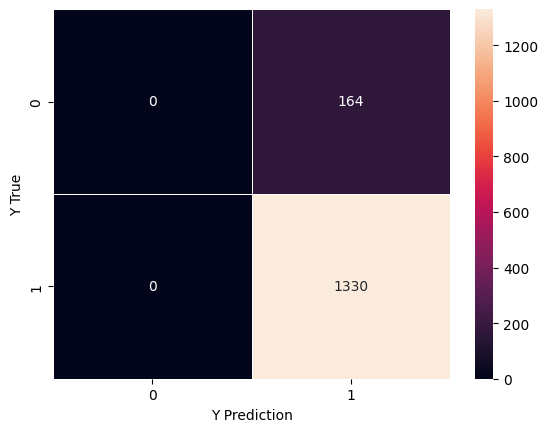

In [ ]:
sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")

In [ ]:
fig = px.scatter(
    x=x_test1[:, 0],
    y=x_test1[:, 1],
    color=y_pred,color_continuous_scale='RdBu',
    labels={'color': 'Predicted Label'},
    title='KNN Predictions on Testing Set'
)
fig.show()